Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


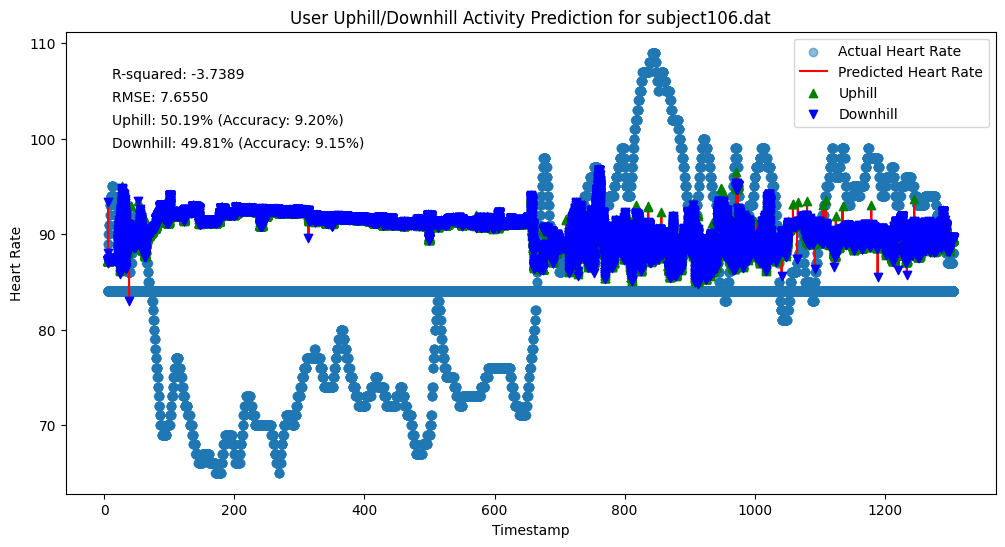

ChatGPT-4 Analysis for subject106.dat:
Your request pertains to the interpretation of the user's activity data and prediction accuracy. Here's a brief summary:

The R-squared value in this case is -3.7389, which is unusual because this value typically ranges between 0 and 1. A negative value suggest that the model fits the data poorly. Specifically, the prediction errors are larger than what would be expected if no predictive model was used at all.

The Root Mean Square Error (RMSE) is 7.6550 which further suggests the presence of an average magnitude of error in the model. Both RMSE and R-squared metrics indicate that our model's estimates are substantially inaccurate.

In terms of activity, the user has approximately the same amount of uphill and downhill activities, with a slight edge to uphill at 50.19% as compared to downhill at 49.81%. 

However, the accuracy of these uphill and downhill activities is low, at just 9.20% and 9.15% respectively. This implies that the system's abili

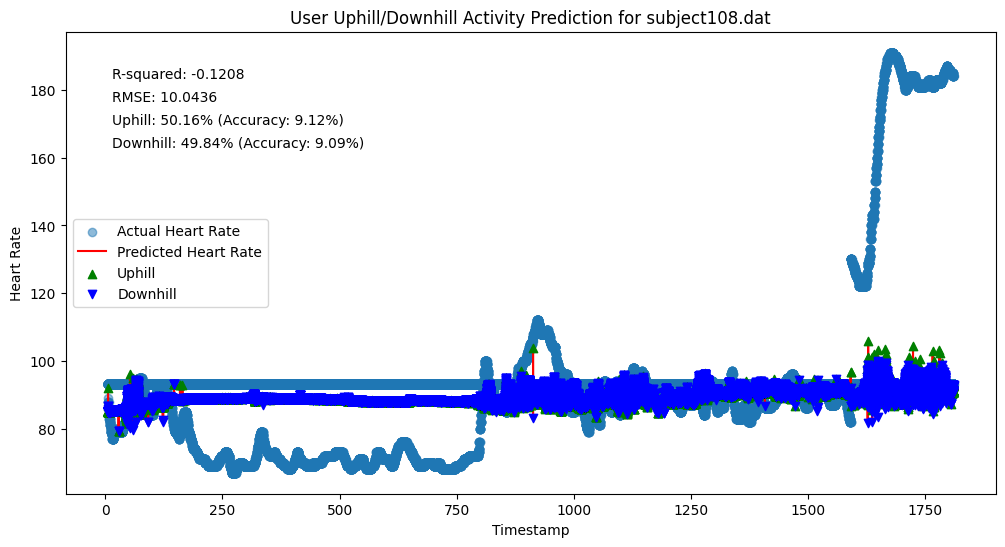

ChatGPT-4 Analysis for subject108.dat:
From the data provided, it seems this user's activity is characterized by a near equal divide between uphill and downhill motions. They tend to participate in uphill activities slightly more, with about 50.16% of their activities counted as such, while downhill activities make up slightly less at 49.84%.

However, when it comes to the accuracy of predicting these activities, accuracy is quite low at just over 9% for both. Specifically, uphill activities are predicted with 9.12% accuracy and downhill activities with 9.09%.

Furthermore, the negative R-squared value suggests that the model used to predict this user's behavior has very poor fit. An R-squared value ranges between 0 and 1, with 1 indicating the model perfectly explains the data and 0 meaning the model does not explain the data at all, while negative values indicate the model fits worse than just a horizontal line.

Additionally, the root mean square error (RMSE) value of 10.0436 shows 

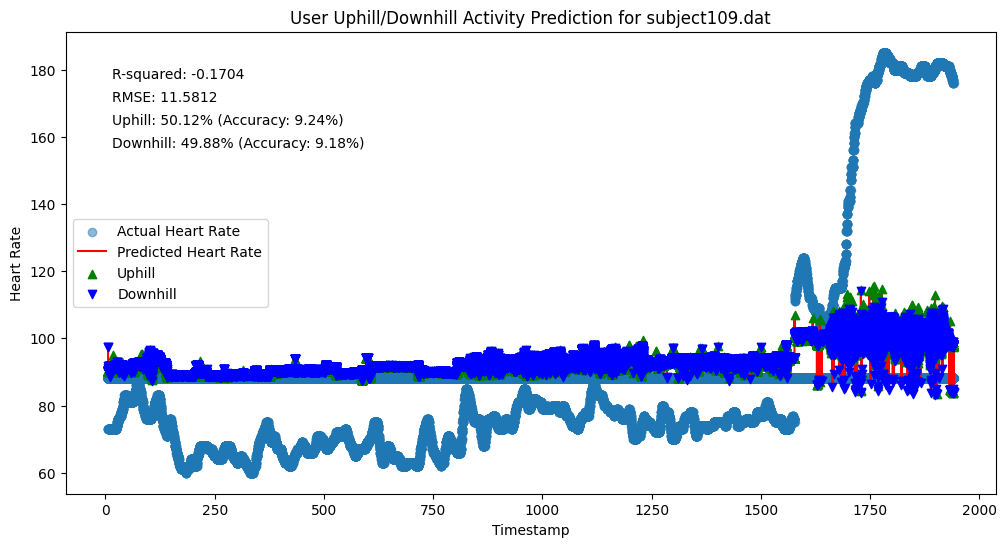

ChatGPT-4 Analysis for subject109.dat:
The given user activity data comes from a file labelled subject109.dat. The R-squared value, which is an indicator of the goodness of fit of a model, is -0.1704. This suggests that the model fit for the user's activity data is poor, as a good R-squared value ranges from 0 to 1. An R-squared value in the negative indicates that the model's predictions are worse than if one were to use the mean as a predictive value. 

The RMSE (Root Mean Square Error), a measure of the differences between values predicted by a model and the actual values, is 11.5812. A smaller RMSE suggests a better fit to the data. Depending on the range of values in the dataset, an RMSE of 11.5812 may or may not translate to a high level of error.

Regarding the user's activity, it is almost evenly split between uphill and downhill actions, with a slight preference to uphill at 50.12% as opposed to downhill at 49.88%.

The prediction accuracy for both uphill and downhill activity

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
import openai
from google.colab import userdata

# Mount Google Drive
drive.mount('/content/drive')

# Path to your .dat files in Google Drive
data_folder = "/content/drive/My Drive/your_data_folder"  # Replace with your folder path

# OpenAI API Key from Colab Secrets
openai.api_key = userdata.get('OPENAI_API_KEY')

def load_data(filepath):
    """Loads data from a .dat file, handling missing/NaN values."""
    try:
        data = np.loadtxt(filepath)
        data = np.where(np.isnan(data), np.nanmean(data, axis=0), data)
        data = np.where(np.isnan(data), 0, data)
        return data
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None

def extract_features_and_targets(data):
    """Extracts features (all columns except heartrate) and targets (heart rate)."""
    if data is None or len(data) == 0:
        return None, None
    heartrate_column = 2
    features = np.concatenate((data[:, :heartrate_column], data[:, heartrate_column + 1:]), axis=1)
    targets = data[:, heartrate_column].reshape(-1, 1)
    return features, targets

def train_and_predict(train_features, train_targets, test_features):
    """Trains a linear regression model and makes predictions."""
    model = LinearRegression()
    model.fit(train_features, train_targets)
    predictions = model.predict(test_features)
    return predictions, model

def calculate_accuracy(test_targets, predictions):
    """Calculates R-squared and RMSE."""
    r2 = r2_score(test_targets, predictions)
    rmse = np.sqrt(mean_squared_error(test_targets, predictions))
    return r2, rmse

def analyze_activity(predictions, test_targets):
    """Analyzes uphill, downhill, and plain activity, returns percentages & accuracy."""
    uphill = []
    downhill = []
    plain = []
    uphill_correct = 0
    downhill_correct = 0
    plain_correct = 0

    for i in range(1, len(predictions)):
        if predictions[i] > predictions[i - 1]:
            uphill.append(i)
            if test_targets[i] > test_targets[i - 1]:
                uphill_correct += 1
        elif predictions[i] < predictions[i - 1]:
            downhill.append(i)
            if test_targets[i] < test_targets[i - 1]:
                downhill_correct += 1
        else:
            plain.append(i)
            if test_targets[i] == test_targets[i-1]:
              plain_correct+=1

    total_points = len(predictions) - 1
    if total_points > 0:
        uphill_percentage = (len(uphill) / total_points) * 100
        downhill_percentage = (len(downhill) / total_points) * 100
        plain_percentage = (len(plain) / total_points) * 100
        uphill_accuracy = (uphill_correct / len(uphill)) * 100 if len(uphill) > 0 else 0
        downhill_accuracy = (downhill_correct / len(downhill)) * 100 if len(downhill) > 0 else 0
        plain_accuracy = (plain_correct / len(plain)) * 100 if len(plain) > 0 else 0

    else:
        uphill_percentage = 0
        downhill_percentage = 0
        plain_percentage = 0
        uphill_accuracy = 0
        downhill_accuracy = 0
        plain_accuracy = 0

    return uphill, downhill, plain, uphill_percentage, downhill_percentage, plain_percentage, uphill_accuracy, downhill_accuracy, plain_accuracy

def plot_results(test_features, test_targets, predictions, r2, rmse, uphill, downhill, plain, uphill_percentage, downhill_percentage, plain_percentage, uphill_accuracy, downhill_accuracy, plain_accuracy, filename):
    """Plots the actual vs. predicted activity and displays accuracy & trend percentages."""
    plt.figure(figsize=(12, 6))
    plt.scatter(test_features[:, 0], test_targets, label='Actual Heart Rate', alpha=0.5)
    plt.plot(test_features[:, 0], predictions, color='red', label='Predicted Heart Rate')
    plt.title(f'User Activity Prediction for {filename}')
    plt.xlabel('Timestamp')
    plt.ylabel('Heart Rate')
    plt.legend()
    plt.text(0.05, 0.9, f'R-squared: {r2:.4f}', transform=plt.gca().transAxes)
    plt.text(0.05, 0.85, f'RMSE: {rmse:.4f}', transform=plt.gca().transAxes)
    plt.text(0.05, 0.80, f'Uphill: {uphill_percentage:.2f}% (Accuracy: {uphill_accuracy:.2f}%)', transform=plt.gca().transAxes)
    plt.text(0.05, 0.75, f'Downhill: {downhill_percentage:.2f}% (Accuracy: {downhill_accuracy:.2f}%)', transform=plt.gca().transAxes)
    plt.text(0.05, 0.70, f'Plain: {plain_percentage:.2f}% (Accuracy: {plain_accuracy:.2f}%)', transform=plt.gca().transAxes)

    plt.scatter(test_features[uphill, 0], predictions[uphill], color='green', marker='^', label='Uphill', zorder=5)
    plt.scatter(test_features[downhill, 0], predictions[downhill], color='blue', marker='v', label='Downhill', zorder=5)
    plt.scatter(test_features[plain,0],predictions[plain], color = 'orange', marker='o', label = 'Plain', zorder = 5)
    plt.legend()
    plt.show()

def get_chatgpt4_analysis(filename, r2, rmse, uphill_percentage, downhill_percentage, plain_percentage, uphill_accuracy, downhill_accuracy, plain_accuracy):
    """Uses ChatGPT-4 to generate a textual analysis of the results."""
    try:
        response = openai.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are an expert data analyst."},
                {"role": "user", "content": f"Analyze the following user activity data from file {filename}:\n\n"
                                          f"R-squared: {r2:.4f}\nRMSE: {rmse:.4f}\nUphill Percentage: {uphill_percentage:.2f}%\n"
                                          f"Downhill Percentage: {downhill_percentage:.2f}%\nPlain Percentage: {plain_percentage:.2f}%\nUphill Accuracy: {uphill_accuracy:.2f}%\nDownhill Accuracy: {downhill_accuracy:.2f}%\nPlain Accuracy: {plain_accuracy:.2f}%\n\nProvide a concise summary of the user's activity trends and prediction accuracy."}
            ]
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error using ChatGPT-4: {e}"

# Main execution
file_list = [f for f in os.listdir(data_folder) if f.endswith('.dat')]
num_files = len(file_list)
train_size = int(num_files * 0.5)

train_files = file_list[:train_size]
test_files = file_list[train_size:]

for filename in test_files:
    filepath = os.path.join(data_folder, filename)
    data = load_data(filepath)

    if data is not None:
        features, targets = extract_features_and_targets(data)

        train_data = []
        for train_filename in train_files:
            train_filepath = os.path.join(data_folder, train_filename)
            train_data_file = load_data(train_filepath)
            if train_data_file is not None:
                train_data.append(train_data_file)
        if len(train_data) > 0:
            train_data_combined = np.concatenate(train_data)
            train_features, train_targets = extract_features_and_targets(train_data_combined)
            test_features, test_targets = extract_features_and_targets(data)

            predictions, model = train_and_predict(train_features, train_targets, test_features)
            r2, rmse = calculate_accuracy(test_targets, predictions)
            uphill, downhill, plain, uphill_percentage, downhill_percentage, plain_percentage, uphill_accuracy, downhill_accuracy, plain_accuracy = analyze_activity(predictions, test_targets)
            plot_results(test_features, test_targets, predictions, r2, rmse, uphill, downhill, plain, uphill_percentage, downhill_percentage, plain_percentage, uphill_accuracy, downhill_accuracy, plain_accuracy, filename)
            chatgpt4_analysis = get_chatgpt4_analysis(filename, r2, rmse, uphill_percentage, downhill_percentage, plain_percentage, uphill_accuracy, downhill_accuracy, plain_accuracy)
            print(f"ChatGPT-4 Analysis for {filename}:\n{chatgpt4_analysis}\n")
        else:
            print("No valid training data found.")